Questo è il codice che include il lavoro fatto sulle basi del lab meeting tenuto in data 02 05 22


In [35]:
# carico i modelli dalla mia repository

def get_dbn_library():
  files = ["RBM.py", "Linear_model_tf.py"]
  repository_url = "https://raw.githubusercontent.com/LorenzoTausani/DBN/master/"
  for file in files:
    ! wget -O {file} {repository_url}{file}

get_dbn_library()

import RBM
import Linear_model_tf

# Importing the libraries
#from RBM_Padella2 import RBM
from Linear_model_tf import LinearClassifier

from RBM import RBM

import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np
import os
import random
import pandas as pd
import time

import pickle

from sklearn.decomposition import PCA

#device in use
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {DEVICE}")

--2022-05-09 22:35:39--  https://raw.githubusercontent.com/LorenzoTausani/DBN/master/RBM.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17282 (17K) [text/plain]
Saving to: ‘RBM.py’

RBM.py              100%[===================>]  16.88K  --.-KB/s    in 0s      

2022-05-09 22:35:40 (52.4 MB/s) - ‘RBM.py’ saved [17282/17282]

--2022-05-09 22:35:40--  https://raw.githubusercontent.com/LorenzoTausani/DBN/master/Linear_model_tf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272 [text/plain]
Saving to: ‘Linear_model_tf.py’

Lin

In [42]:
def seed_everything(seed=42):
    """Seed everything to make the code more reproducable.

    This code is the same as that found from many public Kaggle kernels.

    Parameters
    ----------
    seed: int
        seed value to ues

    """
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

def load_model(filename):

    filename = '/content/gdrive/My Drive/' + filename+ '.pkl'

    from google.colab import drive
    drive.mount('/content/gdrive')

    with open(filename, 'rb') as inp:
        model = pickle.load(inp)

    return model

def model_load_or_create():
  Load_yn=int(input('do you want to load an old model? (1=yes, 0=no)'))



  if Load_yn==1:
    nr_train_epochs_done=int(input('quante epoche di training della RBM?'))
    nr_train_epochs_done_CLASSIFIER=int(input('quante epoche di training del classificatore (0 se non trainato)?'))
    h_train_size = int(input('quanti h train generati (0 se nessuno)?'))
    nr_gibbs_htrain = int(input('con quanti gibbs steps?'))
    h_test_size = int(input('quanti h test generati (0 se nessuno)?'))
    nr_gibbs_htest = int(input('con quanti gibbs steps?'))


    filename = 'rbm_train'+ str(nr_train_epochs_done)+'_classifier_train'+str(nr_train_epochs_done_CLASSIFIER)+'_generated_h_train'+str(h_train_size)+'gibbs'+str(nr_gibbs_htrain)+'_generated_h_test'+str(h_test_size)+'gibbs'+str(nr_gibbs_htest)
    model = load_model(filename)

  else:
    model = RBM(visible_units=28*28 ,
                hidden_units= 8*8 , #standard: 23*23
                k = 5,
                learning_rate = 0.1, #standard: 0.01
                learning_rate_decay = True,
                xavier_init = True,
                increase_to_cd_k = False,
                use_gpu = False) #nota: use_gpu ora e useless


  num_epochs = int(input('trainare la rete? quante epoche? (0 se non si vuole trainare'))

  if num_epochs >0:
    tmp = mnist_data.data
    train_labels = mnist_data.train_labels

    batch_size = 50

    tensor_x = tmp.type(torch.FloatTensor).to(DEVICE) # transform to torch tensors
    tensor_y = train_labels.type(torch.FloatTensor).to(DEVICE)
    _dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
    _dataloader = torch.utils.data.DataLoader(_dataset,batch_size=batch_size,drop_last = True) # create your dataloader


    start = time.time()

    Avg_cost, Std_cost = model.train( _dataloader , num_epochs, batch_size)

    end = time.time()

    print(end - start)


  dati_generati_yn = int(input('creare nuovi dati generati (0=no, 1=si)'))

  if dati_generati_yn ==1:

    nt_tr_h = int(input('aggungere dei train h? quanti dati? (0 se non si vuole trainare'))

    if nt_tr_h>0:
      model.create_h_tran_test_set(mnist_data.train_data, mnist_data.train_labels , nr_train_el=nt_tr_h, nr_test_el=0, nr_gibbs=1)

    nt_te_h = int(input('aggungere dei test h? quanti dati? (0 se non si vuole trainare'))
    gib_nr = int(input('quanti gibbs steps?'))

    if nt_te_h > 0:
      model.create_h_tran_test_set(mnist_data.train_data, mnist_data.train_labels , nr_train_el=0, nr_test_el=nt_te_h, nr_gibbs=gib_nr)


  nr_e = int(input('trainare il linear classifier per dai h? quante epoche? (0 se non si vuole trainare)'))

  if nr_e > 0:
    model.train_h_Linear_classifier(nr_epochs=nr_e, Lr=0.01)

  save_yn = int(input('salvare il modello? (0=no, 1=si)'))

  if save_yn ==1:
    model.save_model(nr_gibbs_htest=gib_nr)

  return (model)

The number shown is the number: 2


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


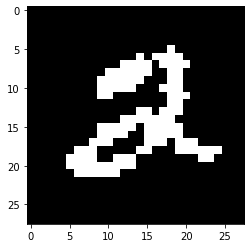

In [37]:
#importo dati mnist e binarizzo

#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

mnist_data.data = (mnist_data.data.type(torch.FloatTensor)/255).bernoulli()
#https://stackoverflow.com/questions/68056122/attributeerror-cant-set-attribute-in-splitting-mnist-dataset

#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

do you want to load an old model? (1=yes, 0=no)0
trainare la rete? quante epoche? (0 se non si vuole trainare100


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


RBM fitting: 1200it [00:04, 286.85it/s]
Epoch:1 ,avg_cost = 3.17366099357605 ,std_cost = 0.9897143840789795 ,avg_grad = 1057.4873046875 ,std_grad = 695.887939453125
RBM fitting: 1200it [00:04, 289.49it/s]
Epoch:2 ,avg_cost = 2.5153324604034424 ,std_cost = 0.15806329250335693 ,avg_grad = 721.9730834960938 ,std_grad = 57.697296142578125
RBM fitting: 1200it [00:04, 288.41it/s]
Epoch:3 ,avg_cost = 2.414235830307007 ,std_cost = 0.14935870468616486 ,avg_grad = 694.413818359375 ,std_grad = 56.3261604309082
RBM fitting: 1200it [00:04, 291.52it/s]
Epoch:4 ,avg_cost = 2.364023447036743 ,std_cost = 0.14511191844940186 ,avg_grad = 679.4252319335938 ,std_grad = 52.07392120361328
RBM fitting: 1200it [00:04, 291.60it/s]
Epoch:5 ,avg_cost = 2.33070707321167 ,std_cost = 0.14126969873905182 ,avg_grad = 670.7879638671875 ,std_grad = 52.02573013305664
RBM fitting: 1200it [00:04, 290.12it/s]
Epoch:6 ,avg_cost = 2.3092851638793945 ,std_cost = 0.1393468677997589 ,avg_grad = 664.3297729492188 ,std_grad = 50.5

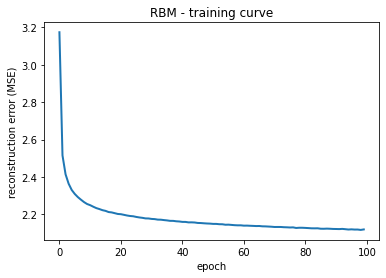

413.17160868644714
creare nuovi dati generati (0=no, 1=si)1
aggungere dei train h? quanti dati? (0 se non si vuole trainare48000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


aggungere dei test h? quanti dati? (0 se non si vuole trainare12000
quanti gibbs steps?1
trainare il linear classifier per dai h? quante epoche? (0 se non si vuole trainare)100
Epoch: 0, loss: 1.4965685615936914
Epoch: 1, loss: 0.8757544169202447
Epoch: 2, loss: 0.7070371642087897
Epoch: 3, loss: 0.6297970458244284
Epoch: 4, loss: 0.5849947518669069
Epoch: 5, loss: 0.5554657528487345
Epoch: 6, loss: 0.5343873116187752
Epoch: 7, loss: 0.5185054607844601
Epoch: 8, loss: 0.505989704746753
Epoch: 9, loss: 0.49589857196745774
Epoch: 10, loss: 0.4875855068055292
Epoch: 11, loss: 0.48052043225616214
Epoch: 12, loss: 0.47451966848845284
Epoch: 13, loss: 0.46930815749801696
Epoch: 14, loss: 0.46471978616900744
Epoch: 15, loss: 0.4606515638530254
Epoch: 16, loss: 0.45705054278175034
Epoch: 17, loss: 0.45386661747470497
Epoch: 18, loss: 0.45089021329768003
Epoch: 19, loss: 0.4482757449770967
Epoch: 20, loss: 0.4458161451698591
Epoch: 21, loss: 0.4436145978669325
Epoch: 22, loss: 0.441589424262444

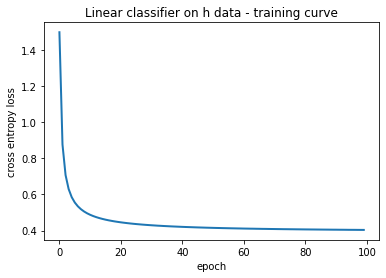

salvare il modello? (0=no, 1=si)0
622.9386651515961
87.13333333333334


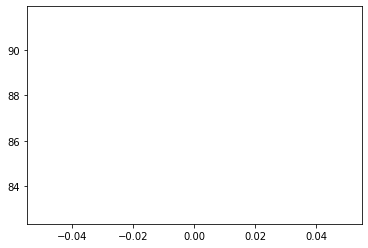

In [43]:
start = time.time()

nr_models_to_compare = 1

perf_list=[]
models_list =[]

for i in range(nr_models_to_compare):

  model = model_load_or_create()
  models_list.append(model)
  perf_list.append(model.test_h_Linear_classifier())

end = time.time()

print(end - start)

print(perf_list[0])

plt.plot(perf_list)

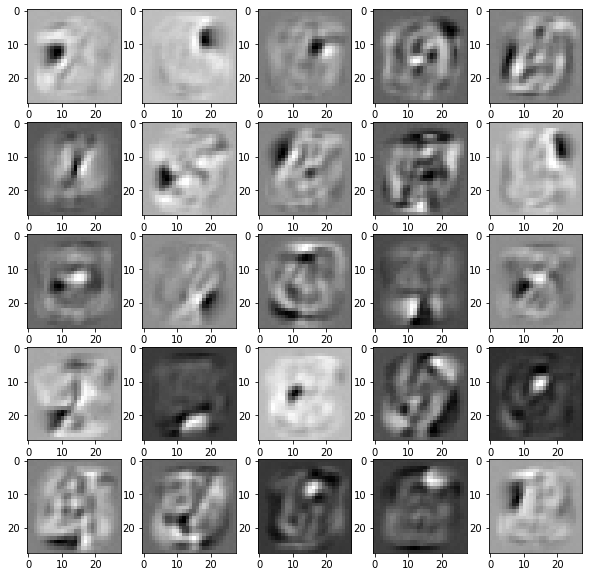

In [44]:
# visualising layer 1
learned_weights = model.W.cpu().transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

<class 'torch.Tensor'>
The original number: 5


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


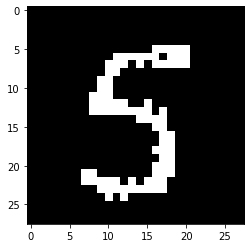

The reconstructed image


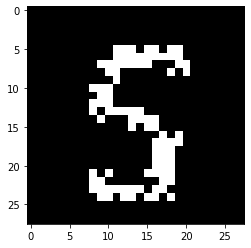

In [50]:
#recostruction check

idx = random.randint(0,len(mnist_data.train_data))
img = mnist_data.train_data[idx]
lbl = mnist_data.train_labels[idx]
reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

_,reconstructed_img= model.reconstruct(reconstructed_img,1)

print(type(lbl))

reconstructed_img = reconstructed_img.view((28,28)).cpu()
print("The original number: {}".format(lbl))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()

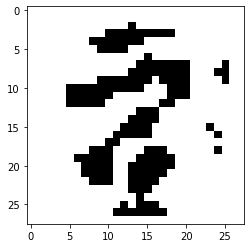

In [57]:
h = model.h_from_label(4,80)

v, sample_v = model.to_visible(h)

reconstructed_img = sample_v.view((28,28)).cpu()

plt.imshow(reconstructed_img , cmap = 'gray')

[0.10871731 0.08027546]


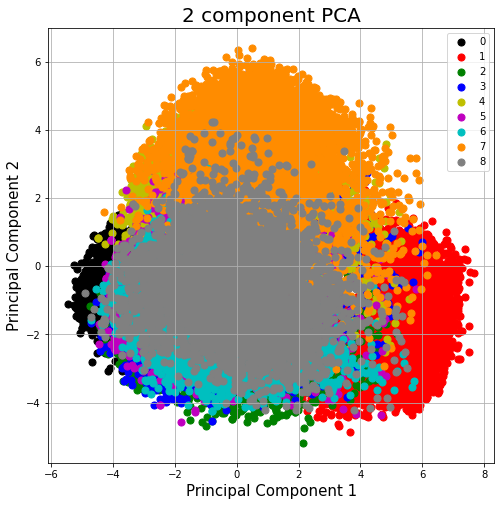

In [59]:
from sklearn.preprocessing import StandardScaler


px = pd.DataFrame(model.h_train_dataset.cpu().numpy())

px = StandardScaler().fit_transform(px)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(px)

print(pca.explained_variance_ratio_)


principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
y_df = pd.DataFrame(model.h_train_labels, columns =['Labels'])

finalDf = pd.concat([principalDf, y_df], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(range(9))
colors = ['k','r', 'g', 'b','y', 'm', 'c', 'darkorange', 'grey', 'deeppink' ]
colors = colors[0:len(targets)]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Labels'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


# vs [0.0473437  0.03374294] delle prime 2 pca del  mnist puro (784). Migliora diminuendo lo spazio hidden (hidden = 100 : [0.10829612 0.09064127]), ma non va meglio con h=64 [0.10871731 0.08027546]

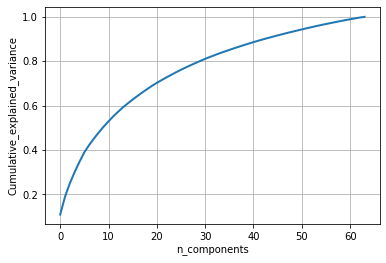

In [61]:
# initializing the pca
from sklearn import decomposition

pca = decomposition.PCA()

# PCA for dimensionality redcution (non-visualization)
pca.n_components = 64
pca_data = pca.fit_transform(px)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [34]:
tmp = mnist_data.data

tmp = tmp.view(len(tmp) , 784)


px = pd.DataFrame(tmp.cpu().numpy())

px = StandardScaler().fit_transform(px)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(px)

print(pca.explained_variance_ratio_)

[0.0473437  0.03374294]


In [29]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(px)

pca.explained_variance_ratio_

array([0.05192069, 0.04296633, 0.03243648, 0.02946411, 0.02466134,
       0.02302882, 0.0172115 , 0.01578608, 0.01417968, 0.01321904],
      dtype=float32)

In [24]:
finalDf['Labels'] == target

0        False
1        False
2        False
3        False
4        False
         ...  
47995    False
47996    False
47997    False
47998    False
47999    False
Name: Labels, Length: 48000, dtype: bool